In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval/train.csv
/kaggle/input/loan-approval/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/kaggle/input/loan-approval/train.csv')
test_df = pd.read_csv('/kaggle/input/loan-approval/test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [6]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
test_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
train_df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [9]:
train_df['person_income'] = train_df['person_income'].astype(float)
train_df['loan_amnt'] = train_df['loan_amnt'].astype(float)


In [10]:
test_df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [11]:
test_df['person_income'] = test_df['person_income'].astype(float)
test_df['loan_amnt'] = test_df['loan_amnt'].astype(float)

In [12]:
test_df.dtypes

id                              int64
person_age                      int64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [13]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14,0
1,1,22,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2,0
2,2,29,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10,0
3,3,30,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5,0
4,4,22,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3,0


In [14]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,25000.0,15.76,0.36,N,2
1,58646,26,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10,Y,4
2,58647,26,30000.0,RENT,5.0,VENTURE,E,4000.0,17.19,0.13,Y,2
3,58648,33,50000.0,RENT,4.0,DEBTCONSOLIDATION,A,7000.0,8.90,0.14,N,7
4,58649,26,102000.0,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000.0,16.32,0.15,Y,4


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
X = train_df.drop(['id', 'loan_status'], axis=1)
X_test = test_df.drop(['id'], axis=1)
y = train_df['loan_status']

In [17]:
encoder = LabelEncoder()

for column in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    X[column] = encoder.fit_transform(X[column])
    X_test[column] = encoder.fit_transform(X_test[column])
    print(f"{column} Mapping:")
    print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))

person_home_ownership Mapping:
{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
loan_intent Mapping:
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
loan_grade Mapping:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
cb_person_default_on_file Mapping:
{'N': 0, 'Y': 1}


In [18]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000.0,3,0.0,1,1,6000.0,11.49,0.17,0,14
1,22,56000.0,2,6.0,3,2,4000.0,13.35,0.07,0,2
2,29,28800.0,2,8.0,4,0,6000.0,8.90,0.21,0,10
3,30,70000.0,3,14.0,5,1,12000.0,11.11,0.17,0,5
4,22,60000.0,3,2.0,3,0,6000.0,6.92,0.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000.0,0,5.0,1,3,25000.0,15.95,0.21,1,10
58641,28,28800.0,3,0.0,3,2,10000.0,12.73,0.35,0,8
58642,23,44000.0,3,7.0,1,3,6800.0,16.00,0.15,0,2
58643,22,30000.0,3,2.0,1,0,5000.0,8.90,0.17,0,3


In [19]:
X_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000.0,3,3.0,2,5,25000.0,15.76,0.36,0,2
1,26,96000.0,0,6.0,4,2,10000.0,12.68,0.10,1,4
2,26,30000.0,3,5.0,5,4,4000.0,17.19,0.13,1,2
3,33,50000.0,3,4.0,0,0,7000.0,8.90,0.14,0,7
4,26,102000.0,0,8.0,2,3,15000.0,16.32,0.15,1,4
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200.0,0,2.0,0,1,3000.0,10.37,0.10,0,4
39094,22,48000.0,0,6.0,1,0,7000.0,6.03,0.15,0,3
39095,51,60000.0,0,0.0,4,0,15000.0,7.51,0.25,0,25
39096,22,36000.0,0,4.0,4,3,14000.0,15.62,0.39,1,4


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import xgboost as xgb

In [23]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate='0.03',
    n_estimators=500,
    max_depth=5,
    use_label_encoder=False,
    n_jobs=-1,
    device='cpu'
)

In [25]:
import time 

start_time = time.time()

xgb_model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time

print("Training time: {:.2f}s".format(training_time))

Training time: 1.13s


In [30]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn import metrics

In [28]:
y_prob = xgb_model.predict_proba(X_val)[:, 1]
y_pred = xgb_model.predict(X_val)



In [29]:
accuracy = metrics.accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print('Accuracy score is:', accuracy)
print('f1_score is:', f1)
print('roc-auc score is:', roc_auc)

Accuracy score is: 0.9533634580953193
f1_score is: 0.8153898076274047
roc-auc score is: 0.9567463131655934


In [31]:
classification = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print('\nClassification Report:', classification)
print('\nConfusion Matrix:', confusion)


Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.74      0.82      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729


Confusion Matrix: [[9974  113]
 [ 434 1208]]


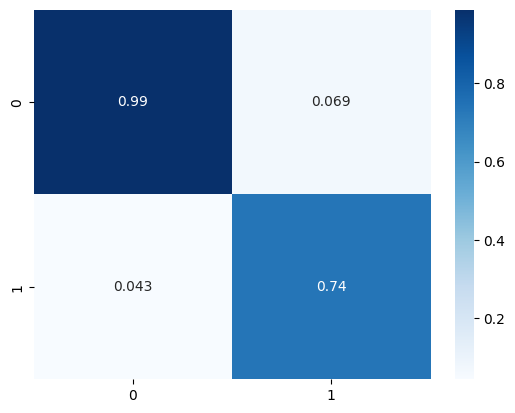

In [35]:
import seaborn as sns

sns.heatmap(confusion / np.sum(confusion, axis=1), annot=True, fmt=".2", cmap="Blues")
plt.show()

In [39]:
test_pred = xgb_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({'id': test_df['id'], 'loan_status': test_pred})
submission.to_csv('submission.csv', index=False)